**step 1:** installing **dependancies**

In [ ]:

!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.0 MB/s 
     |████████████████████████████████| 604 kB 52.5 MB/s 
     |████████████████████████████████| 120 kB 54.6 MB/s 
     |████████████████████████████████| 47.6 MB 1.2 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


// open cv
// import numpy
//import imutil
//importeasyocr
//import matplotlib 

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

**step 2**: read the image in **grayscale** and **blur**

in cv2 we give our input image


we change the colour scheme from bgr to grayscale and visualise it using matplotlib

or u can leave it out and use 
plt.imshow(gray) intead of
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

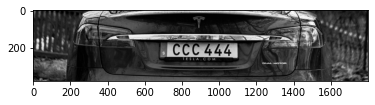

In [ ]:

img = cv2.imread('/car3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving car3.jpg to car3.jpg


**Step 3:**
here we perform our filtering and edge detection using the **CANNY algorithm** and again use matplotlib to visualize it  

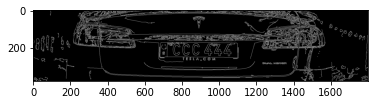

In [ ]:

bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


Step 3:
**contourin**g and **applying a mask** on the **image**

In [ ]:

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

looping through our contours values we store them in a temporary variable named location to find the actual location of licence plate in our image

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

temporary variable named location 

In [ ]:

location

array([[[ 722,  173]],

       [[1094,  175]],

       [[1099,  251]],

       [[ 721,  249]]], dtype=int32)

**step 4**:
**masking** the image and specified our contours through the image and overlaid our required segmented image / liscence plate

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(img, img, mask=mask)

visualisation

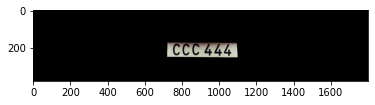

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


cropped out the segment from our image where we obtain a set of coordinates which dont contain the black pixels that are stored in an array, we do array filtering to display the pixel that contain our liscence plate values

In [ ]:

(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

visualisation

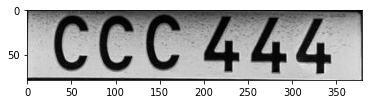

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


**Step 5:**
easyocr to read text

In [ ]:

reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[23, 0], [357, 0], [357, 79], [23, 79]], 'CCC 444', 0.7855179669719217)]

**Step 6:** **rendering** the result value

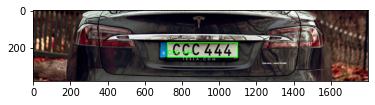

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))